## Анализ данных по COVID-19

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df_0 = pd.read_csv("data/covid_19_data.csv")
df_0.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [5]:
# смотрим последнюю дату
df_0["ObservationDate"].iloc[-1]

'05/29/2021'

In [7]:
df_0.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [27]:
# Очистка
# удаление ненужных столбцов
df_1 = df_0.drop(["SNo", 'Last Update'], axis=1)
df_1.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  306429 non-null  object 
 1   Province/State   228326 non-null  object 
 2   Country/Region   306429 non-null  object 
 3   Confirmed        306429 non-null  float64
 4   Deaths           306429 non-null  float64
 5   Recovered        306429 non-null  float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


In [28]:
# проверка на дубликаты
df_1.duplicated().sum()

1

In [29]:
# удаление дубликатов
df_1.drop_duplicates(inplace=True)

In [32]:
df_1["Country/Region"].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', 'Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia',
       'Portugal', 'Andorra', '

In [31]:
# удалене артефактов из названий стран
df_1["Country/Region"] = df_1["Country/Region"].str.strip(" ,()'")

In [33]:
# изучаем страну "Others"
df_1.loc[df_1["Country/Region"] == "Others", :]

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
965,02/07/2020,Cruise Ship,Others,61.0,0.0,0.0
1039,02/08/2020,Cruise Ship,Others,61.0,0.0,0.0
1113,02/09/2020,Diamond Princess cruise ship,Others,64.0,0.0,0.0
1181,02/10/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1255,02/11/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1328,02/12/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1403,02/13/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1479,02/14/2020,Diamond Princess cruise ship,Others,218.0,0.0,0.0
1554,02/15/2020,Diamond Princess cruise ship,Others,285.0,0.0,0.0
1628,02/16/2020,Diamond Princess cruise ship,Others,355.0,0.0,0.0


In [34]:
df_1.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [35]:
# изучаем даты
df_1.loc[0, 'ObservationDate']

'01/22/2020'

In [37]:
# конвертация временных данных
date = '01/22/2020'
pd.to_datetime(date).date()

datetime.date(2020, 1, 22)

In [38]:
# копируем датафрейм, чтобы новый дата фрейм был независим
df_2 = df_1.copy()

In [44]:
# конвентируем даты в Timestamp
df_2['ObservationDate'] = pd.to_datetime(df_2['ObservationDate'])
df_2.loc[0, 'ObservationDate']

Timestamp('2020-01-22 00:00:00')

In [45]:
df_2['ObservationDate'] = df_2['ObservationDate'].apply(lambda ts: ts.date())

In [49]:
# группипровка данных по странам и датам
cd_data = df_2.groupby(['Country/Region', 'ObservationDate'])
cd_data.head(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
306317,2021-05-29,South Australia,Australia,752.0,4.0,746.0
306332,2021-05-29,Tasmania,Australia,234.0,13.0,221.0
306362,2021-05-29,Unknown,Belgium,20219.0,24921.0,0.0
306392,2021-05-29,Victoria,Australia,20593.0,820.0,19725.0


In [50]:
df_2.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [51]:
# данные по странам
max_df = df_2.groupby("Country/Region")[['Confirmed','Deaths','Recovered']].max()
max_df.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,70111.0,2899.0,57281.0
Albania,132297.0,2449.0,129215.0
Algeria,128456.0,3460.0,89419.0
Andorra,13693.0,127.0,13416.0
Angola,34180.0,757.0,27646.0


In [54]:
max_df.sort_values("Confirmed").head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
China,0.0,0.0,0.0
East Timor,1.0,0.0,0.0
The Bahamas,1.0,0.0,0.0
Curacao,1.0,0.0,0.0
Guernsey,1.0,0.0,0.0
Greenland,1.0,0.0,0.0
The Gambia,1.0,0.0,0.0
Micronesia,1.0,0.0,1.0
Vatican City,1.0,0.0,0.0


In [55]:
max_df.sort_values("Confirmed", ascending=False).head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
France,5863138.0,108532.0,331686.0
India,5713215.0,94030.0,5339838.0
Turkey,5235978.0,47271.0,5094279.0
UK,3910803.0,112385.0,4192.0
US,3788713.0,63236.0,6399531.0
Argentina,3732263.0,77108.0,3288467.0
Brazil,3254893.0,111123.0,2895697.0
Iran,2893218.0,79741.0,2425033.0
Poland,2871371.0,73682.0,2636675.0


In [56]:
df_2.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [58]:
# группируем по датам (по всему миру)
w_data = df_2.groupby("ObservationDate").sum()
w_data.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-01-22,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,Mainland ChinaMainland ChinaMainland ChinaMain...,557.0,17.0,30.0
2020-01-23,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,Mainland ChinaMainland ChinaMainland ChinaMain...,653.0,17.0,32.0
2020-01-24,HubeiGuangdongZhejiangBeijingChongqingHunanGua...,Mainland ChinaMainland ChinaMainland ChinaMain...,941.0,26.0,39.0
2020-01-25,HubeiGuangdongZhejiangChongqingHunanBeijingAnh...,Mainland ChinaMainland ChinaMainland ChinaMain...,1437.0,42.0,42.0
2020-01-26,HubeiGuangdongZhejiangHenanChongqingHunanBeiji...,Mainland ChinaMainland ChinaMainland ChinaMain...,2118.0,56.0,56.0


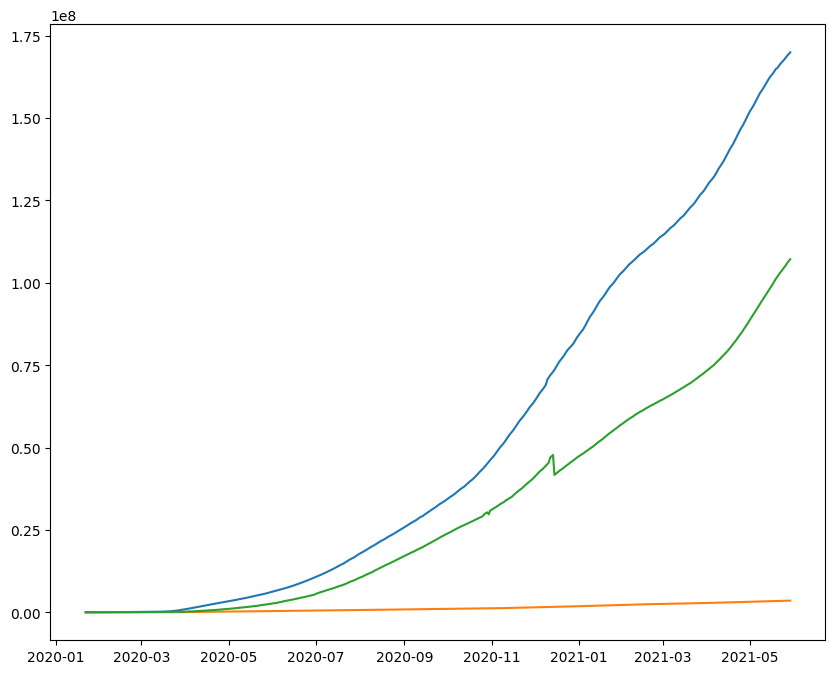

In [59]:
# визуализация динамики пандемии по всему миру
plt.figure(figsize=(10, 8))

plt.plot(w_data.index, w_data['Confirmed'])
plt.plot(w_data.index, w_data['Deaths'])
plt.plot(w_data.index, w_data['Recovered'])

plt.show()